# **Thermal Limitation of Seagrasses in Great Barrier Reef Ecosystem**


In [46]:
#import io
#import requests
#import datetime as dt
#from dateutil.relativedelta import *

#import netCDF4
#from netCDF4 import Dataset, num2date

import cmocean

#import seaborn as sns
#import pymannkendall as mk

import os
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12,7)
%matplotlib inline

#import numpy as np
import xarray as xr
#import pandas as pd


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory


Input the dataset from the eReef and open the dataset through xarray:

In [47]:
inputFile = "https://thredds.ereefs.aims.gov.au/thredds/dodsC/GBR4_H2p0_B3p1_Cq3b_Dhnd/monthly.nc"
ds = xr.open_dataset(inputFile)
ds

<xarray.Dataset>
Dimensions:          (k: 17, latitude: 723, longitude: 491, time: 101)
Coordinates:
    zc               (k) float64 ...
  * latitude         (latitude) float64 -28.7 -28.67 -28.64 ... -7.066 -7.036
  * longitude        (longitude) float64 142.2 142.2 142.2 ... 156.8 156.8 156.9
  * time             (time) datetime64[ns] 2010-11-30T14:00:00 ... 2019-03-31...
Dimensions without coordinates: k
Data variables: (12/108)
    TOTAL_NITROGEN   (time, k, latitude, longitude) float32 ...
    alk              (time, k, latitude, longitude) float32 ...
    BOD              (time, k, latitude, longitude) float32 ...
    Chl_a_sum        (time, k, latitude, longitude) float32 ...
    CO32             (time, k, latitude, longitude) float32 ...
    DetBL_N          (time, k, latitude, longitude) float32 ...
    ...               ...
    SGH_N            (time, latitude, longitude) float32 ...
    SGH_N_pr         (time, latitude, longitude) float32 ...
    SGHROOT_N        (time, latitude, longitude) float32 ...
    SGROOT_N         (time, latitude, longitude) float32 ...
    TSSM             (time, latitude, longitude) float32 ...
    Zenith2D         (time, latitude, longitude) float32 ...
Attributes: (12/19)
    Conventions:                   CF-1.0
    NCO:                           netCDF Operators version 4.7.7 (Homepage =...
    RunID:                         2
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    aims_ncaggregate_buildDate:    2021-09-08T02:56:25+10:00
    aims_ncaggregate_datasetId:    products__ncaggregate__ereefs__GBR4_H2p0_B...
    ...                            ...
    metadata_link:                 https://eatlas.org.au/data/uuid/61f3a6df-2...
    paramfile:                     /home/bai155/EMS_solar2/gbr4_H2p0_B3p1_Cb/...
    paramhead:                     eReefs 4 km grid. SOURCE Catchments with 2...
    technical_guide_link:          https://eatlas.org.au/pydio/public/aims-er...
    technical_guide_publish_date:  2020-08-18
    title:                         eReefs AIMS-CSIRO GBR4 BioGeoChemical 3.1 ...



---



**Summer (2019/01/31) temperature at different water depth**


Temperature in entire great barrier reef at -0.5m water depth:

In [45]:
size = (15, 18)
color = cmocean.cm.thermal

fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([142.4, 157, -7, -28.6], ccrs.PlateCarree())

cf = ds.temp.isel(k=-1,time=-3).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 22, vmax = 29,
    add_colorbar=False
)

cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds.temp.long_name+' '+ds.temp.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# plt.title('zc = '+str(ds_bio.zc.values.item(-1))+' m at '+str(ds_bio.coords['time'].values[-1])[:10],
#           fontsize=11
#          )

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)

# ax.scatter(reef_lon, reef_lat, c='deeppink', s=100, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree())
# ax.scatter(reef_lon1, reef_lat1, c='deeppink', s=100, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree())

# Box
plt.plot([143,145,145,143,143], [-15,-15,-13.5,-13.5,-15], color="r", linewidth=2, transform=ccrs.PlateCarree())

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

Location of study area (Princess Charlotte Bay):

In [48]:
min_lon = 142     # lower left longitude
min_lat = -16     # lower left latitude
max_lon = 148     # upper right longitude
max_lat = -12     # upper right latitude

# Defining the boundaries
lon_bnds = [min_lon, max_lon]
lat_bnds = [min_lat, max_lat]

# Performing the reduction
#ds.temp_clip = ds_bio.sel(latitude=slice(*lat_bnds), longitude=slice(*lon_bnds))
#ds_hydro_clip = ds_hydro.sel(latitude=slice(*lat_bnds), longitude=slice(*lon_bnds))

Point out the sites (subtidal and intrtidal):

In [49]:
reef_lat = -14.06
reef_lon = 144.63
reef_lat1 = -13.99
reef_lon1 = 144.04

Zoom to the study area base on -0.5m of water depth:

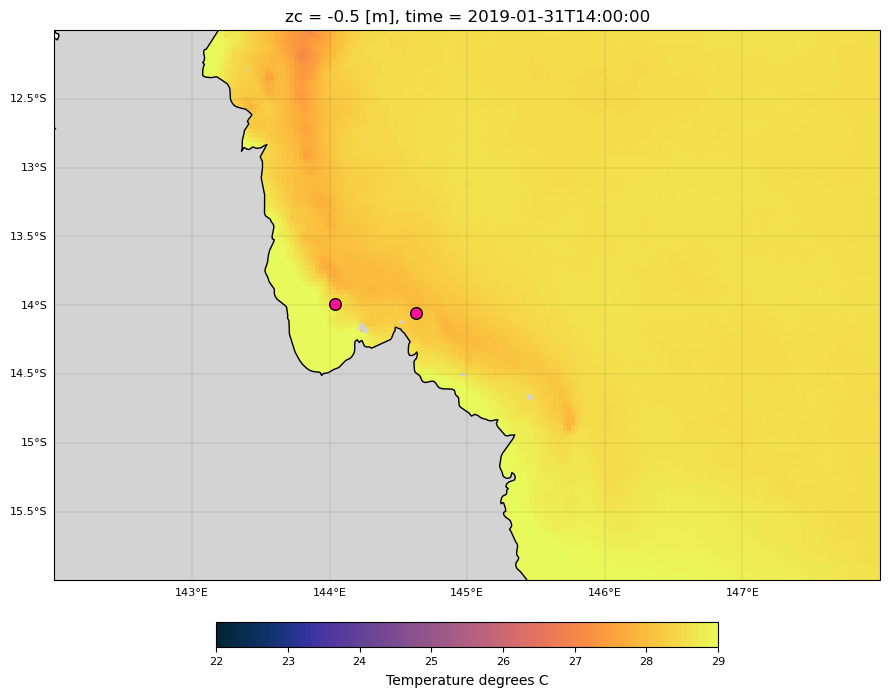

<Figure size 1200x700 with 0 Axes>

In [21]:
size = (9, 10)

color = cmocean.cm.thermal

fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([min_lon, max_lon, min_lat, max_lat], ccrs.PlateCarree())

cf =ds.temp.isel(time=-3,k=-1).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 22, vmax = 29,
    add_colorbar=False
)

cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds.temp.long_name+' '+ds.temp.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

#plt.title('zc = '+str(ds_bio_clip.zc.values.item(-1))+' m at '+
         # str(ds_bio_clip.coords['time'].values[-1])[:10],
         # fontsize=11
     #    )

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)

ax.scatter(reef_lon, reef_lat, c='deeppink', s=70, edgecolors='k', 
           linewidth=1, transform=ccrs.PlateCarree())

ax.scatter(reef_lon1, reef_lat1, c='deeppink', s=70, edgecolors='k', 
           linewidth=1, transform=ccrs.PlateCarree())
# ax.scatter(144, -14, c='green', s=70, edgecolors='k', 
#            linewidth=1, transform=ccrs.PlateCarree())
plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

Temperature in entire great barrier reef at -5.5m water depth:

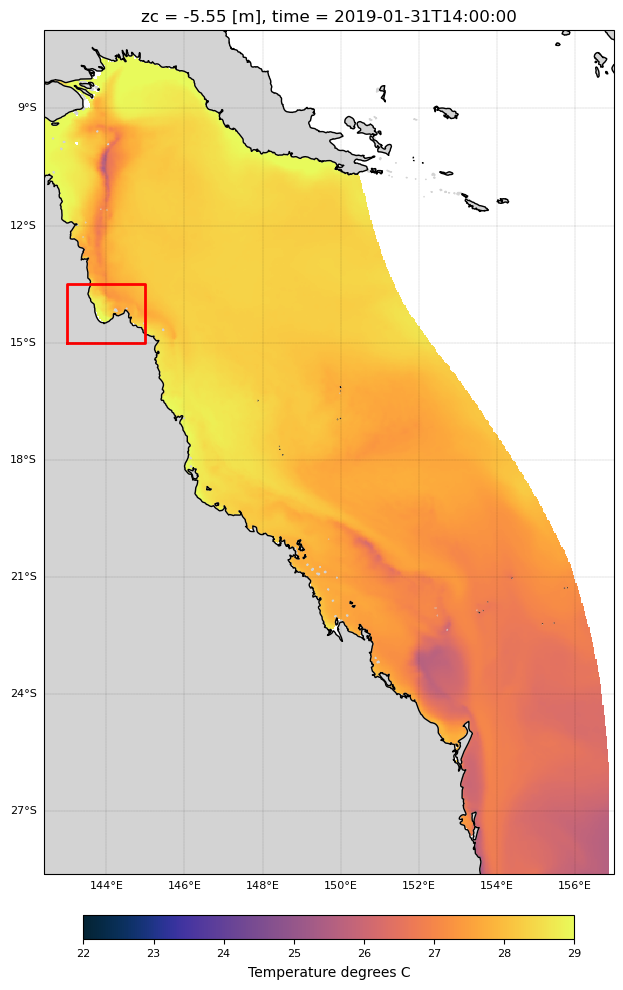

<Figure size 1200x700 with 0 Axes>

In [50]:
size = (9, 10)
color = cmocean.cm.thermal

fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([142.4, 157, -7, -28.6], ccrs.PlateCarree())

cf = ds.temp.isel(k=-4,time=-3).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 22, vmax = 29,
    add_colorbar=False
)

cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds.temp.long_name+' '+ds.temp.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# plt.title('zc = '+str(ds_bio.zc.values.item(-1))+' m at '+str(ds_bio.coords['time'].values[-1])[:10],
#           fontsize=11
#          )

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)

# ax.scatter(reef_lon, reef_lat, c='deeppink', s=100, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree())
# ax.scatter(reef_lon1, reef_lat1, c='deeppink', s=100, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree())

# Box
plt.plot([143,145,145,143,143], [-15,-15,-13.5,-13.5,-15], color="r", linewidth=2, transform=ccrs.PlateCarree())

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

Temperature in entire great barrier reef at -39.5m water depth:

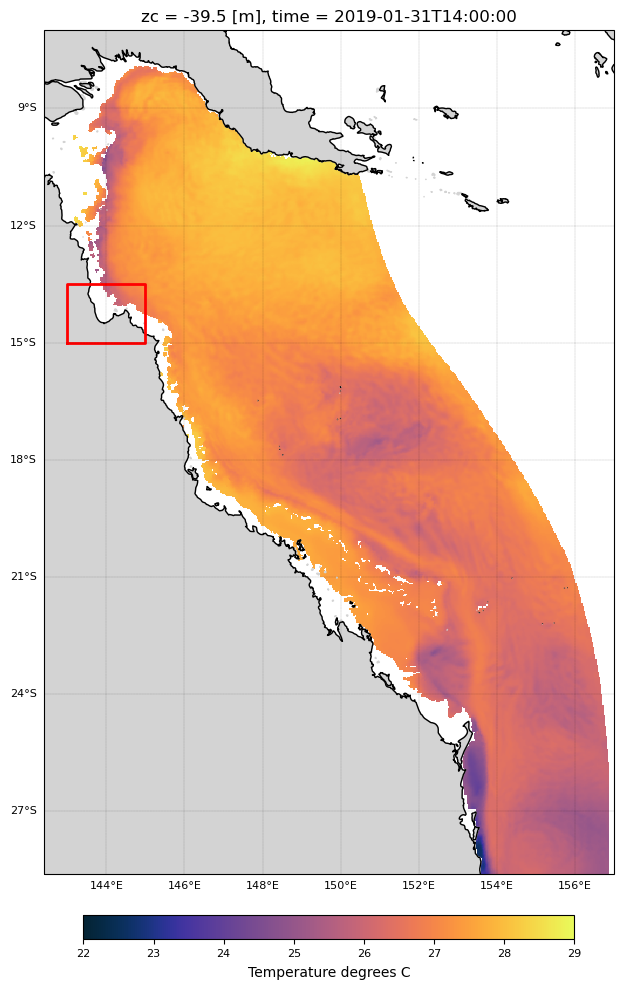

<Figure size 1200x700 with 0 Axes>

In [25]:
size = (9, 10)

color = cmocean.cm.thermal

fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([142.4, 157, -7, -28.6], ccrs.PlateCarree())

cf = ds.temp.isel(k=-10,time=-3).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 22, vmax = 29,
    add_colorbar=False
)

cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds.temp.long_name+' '+ds.temp.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# plt.title('zc = '+str(ds_bio.zc.values.item(-1))+' m at '+str(ds_bio.coords['time'].values[-1])[:10],
#           fontsize=11
#          )

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)

# ax.scatter(reef_lon, reef_lat, c='deeppink', s=100, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree())
# ax.scatter(reef_lon1, reef_lat1, c='deeppink', s=100, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree())

# Box
plt.plot([143,145,145,143,143], [-15,-15,-13.5,-13.5,-15], color="r", linewidth=2, transform=ccrs.PlateCarree())

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

Zoom to the study area base on -39.5m of water depth:

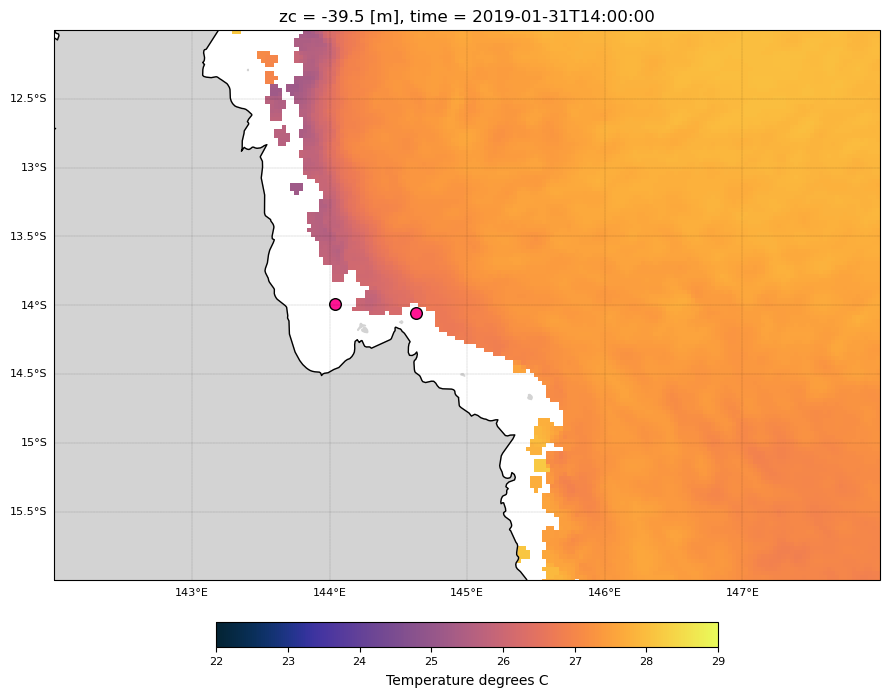

<Figure size 1200x700 with 0 Axes>

In [35]:
size = (9, 10)

color = cmocean.cm.thermal

fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([min_lon, max_lon, min_lat, max_lat], ccrs.PlateCarree())

cf =ds.temp.isel(time=-3,k=-10).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 22, vmax = 29,
    add_colorbar=False
)

cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds.temp.long_name+' '+ds.temp.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

#plt.title('zc = '+str(ds_bio_clip.zc.values.item(-1))+' m at '+
         # str(ds_bio_clip.coords['time'].values[-1])[:10],
         # fontsize=11
     #    )

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)

ax.scatter(reef_lon, reef_lat, c='deeppink', s=70, edgecolors='k', 
           linewidth=1, transform=ccrs.PlateCarree())

ax.scatter(reef_lon1, reef_lat1, c='deeppink', s=70, edgecolors='k', 
           linewidth=1, transform=ccrs.PlateCarree())
# ax.scatter(144, -14, c='green', s=70, edgecolors='k', 
#            linewidth=1, transform=ccrs.PlateCarree())
plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

Because both subtidal and intertidal sites at -39.5m of water depth are reach bottom of sea bed, the temperatures at -39.5m of water depth are making no sence. 



---



**Winter (2018/07/31) temperature at -0.5m of water depth**

Temperature in entire great barrier reef:

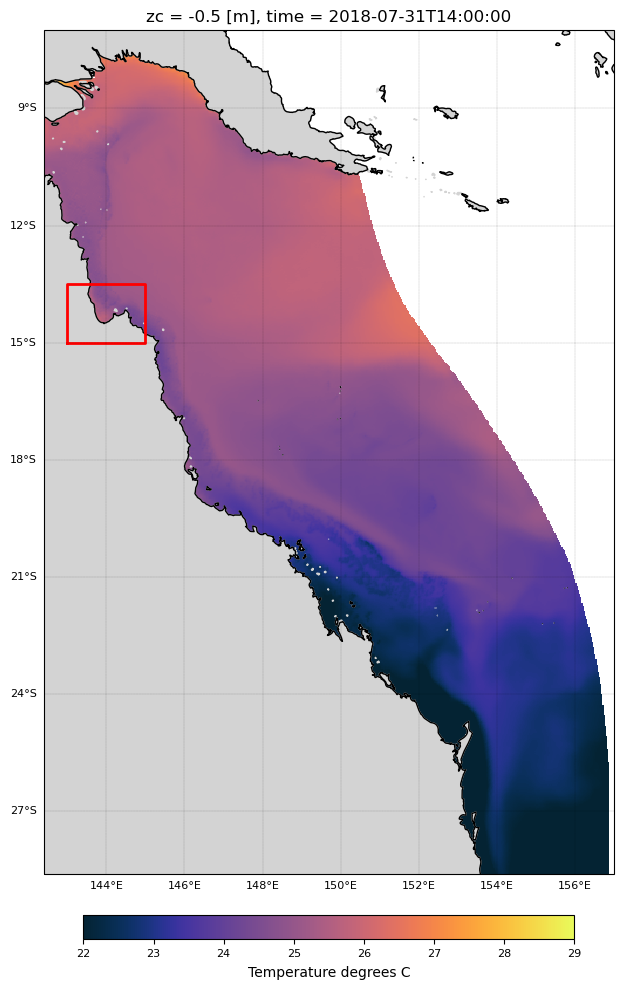

<Figure size 1200x700 with 0 Axes>

In [36]:
size = (9, 10)
color = cmocean.cm.thermal

fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([142.4, 157, -7, -28.6], ccrs.PlateCarree())

cf = ds.temp.isel(k=-1,time=-9).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 22, vmax = 29,
    add_colorbar=False
)

cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds.temp.long_name+' '+ds.temp.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# plt.title('zc = '+str(ds_bio.zc.values.item(-1))+' m at '+str(ds_bio.coords['time'].values[-1])[:10],
#           fontsize=11
#          )

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)

# ax.scatter(reef_lon, reef_lat, c='deeppink', s=100, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree())
# ax.scatter(reef_lon1, reef_lat1, c='deeppink', s=100, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree())

# Box
plt.plot([143,145,145,143,143], [-15,-15,-13.5,-13.5,-15], color="r", linewidth=2, transform=ccrs.PlateCarree())

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

Zoom to the study area:

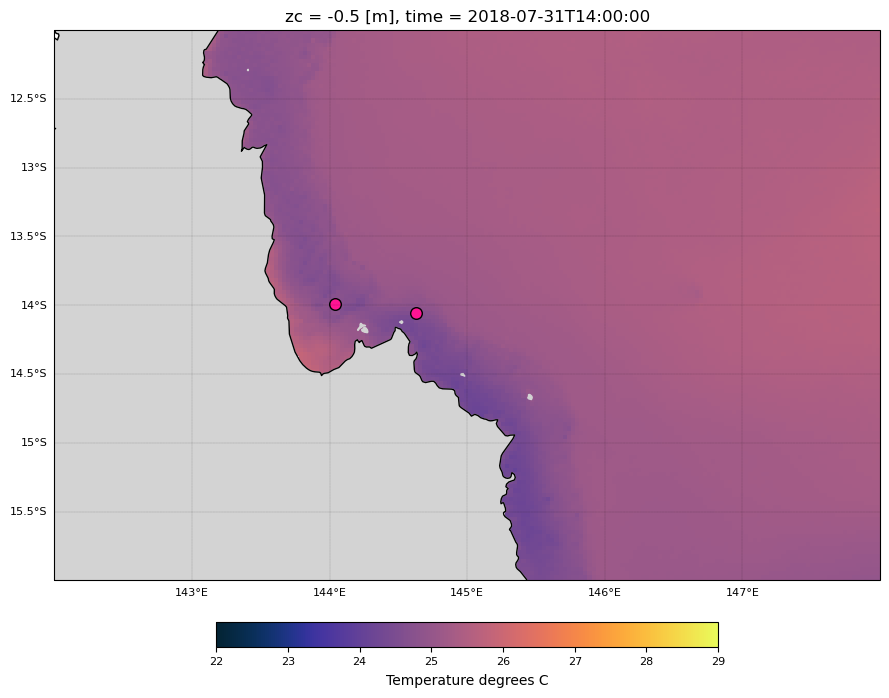

<Figure size 1200x700 with 0 Axes>

In [42]:
size = (9, 10)

color = cmocean.cm.thermal

fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([min_lon, max_lon, min_lat, max_lat], ccrs.PlateCarree())

cf =ds.temp.isel(time=-9,k=-1).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 22, vmax = 29,
    add_colorbar=False
)

cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds.temp.long_name+' '+ds.temp.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

#plt.title('zc = '+str(ds_bio_clip.zc.values.item(-1))+' m at '+
         # str(ds_bio_clip.coords['time'].values[-1])[:10],
         # fontsize=11
     #    )

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)

ax.scatter(reef_lon, reef_lat, c='deeppink', s=70, edgecolors='k', 
           linewidth=1, transform=ccrs.PlateCarree())

ax.scatter(reef_lon1, reef_lat1, c='deeppink', s=70, edgecolors='k', 
           linewidth=1, transform=ccrs.PlateCarree())
# ax.scatter(144, -14, c='green', s=70, edgecolors='k', 
#            linewidth=1, transform=ccrs.PlateCarree())
plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()